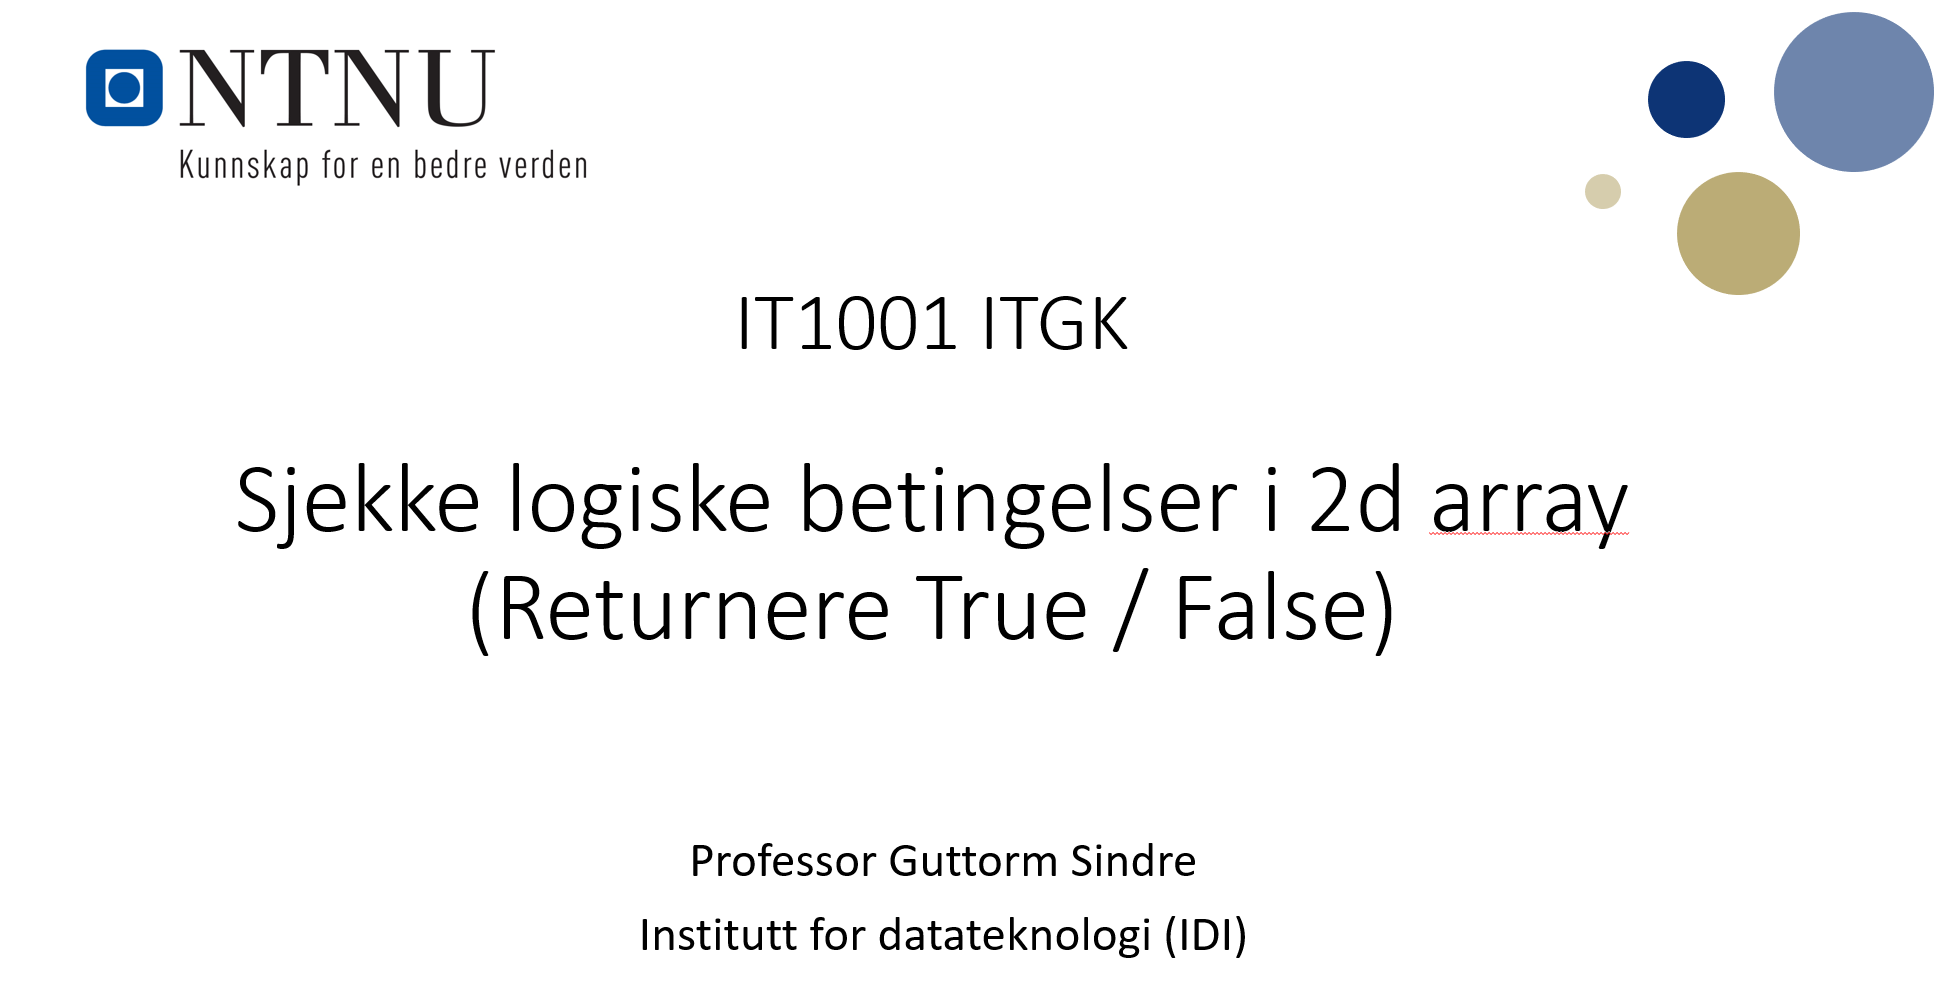

# Sjekke logiske betingelser i 2d array

Funksjoner som sjekker om 2d array tilfredsstiller logisk betingelse
- returnerer True eller False
- ligner på __F-5__ (logisk betingelse i streng)
    - men mer komplisert her, to dimensjoner
- vil kanskje trenge dobbel løkke

Ser først på eksempel der vi klarer oss med enkel løkke:
- betingelsen gjelder sum av rad
    - kan regnes ut for hele rada med np.sum()
- trenger derfor __ikke__ ei indre løkke element for element

In [1]:
import numpy as np

def check_array(arr, c, d):
    '''
    Inn: arr - et numpy array med tall; c og d - heltall
    Returnerer True hvis arr har minst c rader med sum > d,
    ellers returneres False
    '''
    count = 0
    for row in arr:    # ser på ei og ei rad
        if np.sum(row) > d:
            count += 1
            if count >= c:        # straks vi har funnet minst c rader...
                return True       # ... kan vi returnere True
    return False                  # hvis vi fullfører løkka uten å ha 
                                  # returnert True, kan vi konkludere False
    
a = np.array([[2, 1, 0, -1],
              [5, 1, 7, 2],
              [0, 8, 8, 3],
              [4, 6, 7, -1]])

print(check_array(a, 3, 10))
print(check_array(a, 3, 20))

True
False


### Litt vanskeligere problem:
- sum som bare gjelder __noen av elementene__ i ei rad...
- blir vanskelig å bruke np.sum()-funksjonen direkte
    - heller bruke ei indre løkke, se på hvert element
- eksempel her: bare oddetall som står på oddetallsindeks i rada

In [2]:
import numpy as np

def check_array(arr, c, d):
    '''
    Inn: arr - et numpy array med tall; c og d - heltall
    Returnerer True hvis arr har minst c rader med sum > d,
    ellers returneres False
    '''
    count = 0
    for row in arr:    # ser på ei og ei rad
        summen = 0
        for i in range(1, len(row), 2): # start 1, stegverdi 2 pga kun oddetallsindekser
            if row[i] % 2 == 1:         # oddetall
                summen += row[i]
        if summen > d:            # marg for denne if-setninga må hit hvis tall kan være negative
            count += 1       
            if count >= c:        # straks vi har funnet minst c rader...
                return True       # ... kan vi returnere True
    return False                  # hvis vi fullfører løkka uten å ha 
                                  # returnert True, kan vi konkludere False
    
a = np.array([[2, 11, 0, -3],
              [5, 1, 7, 2],
              [0, 9, 8, 3],
              [4, 6, 7, -1]])

print(check_array(a, 2, 10))
print(check_array(a, 1, 10))

False
True


In [3]:
import numpy as np

def check_array(arr, c, d):
    '''
    Inn: arr - et numpy array med tall >= 0; c og d - heltall
    Returnerer True hvis arr har minst c rader med sum > d,
    ellers returneres False
    '''
    count = 0
    for row in arr:    # ser på ei og ei rad
        summen = 0
        for i in range(1, len(row), 2): # start 1, stegverdi 2 pga kun oddetallsindekser
            if row[i] % 2 == 1:         # oddetall
                summen += row[i]
                if summen > d:            # marg for if-setninga ok her hvis alle tall positive
                    count += 1       
                    if count >= c:        # straks vi har funnet minst c rader...
                        return True       # ... kan vi returnere True
    return False                  # hvis vi fullfører løkka uten å ha 
                                  # returnert True, kan vi konkludere False
    
a = np.array([[2, 11, 0, 3],
              [5, 1, 7, 2],
              [0, 9, 8, 3],
              [4, 6, 7, 1]])

print(check_array(a, 2, 15))
print(check_array(a, 2, 10))

False
True


## Oppsummering
I det vanskeligere eksemplet trengte vi dobbel løkke
- og holde orden på to variable underveis:
    - en for å aggregere data __inni__ hver enkelt rad 
        - (i eksemplet: sum av oddetall)
    - en for å aggregere data på tvers av rader 
        - (i eksemplet: antall rader som tilfredsstilte betingelse)
        
Vær nøye med margplassering av if-setninger og return
- når kan vi med sikkerhet trekke en viss konklusjon

Hvor skal vi returnere True, og hvor False?
- kommer også an på hva vi kan konkludere underveis
- og hva vi må kjøre gjennom hele arrayet for å være sikker på